In [1]:
# The previous 4th order polynomial had a stable stationary point in the negative space
# This was resulting in a few problems where the integral was undefined at x=0 as there was an x in the denominator
# of the integral
# In any case, it's a logical assumption to work in the positive space only as we cannot have negative cell state
# space - or what is x actually representing here?
# x = [x1,x2,,,,,xn] where x represents a gene and there are n genes
# and each x is a level of expression value?
# In Lucy's model is each x a state of on or off for a transcription factor???

In [2]:
# Import 3rd party packages

using DifferentialEquations, StochasticDiffEq, LinearAlgebra, Calculus, Discretizers, KernelDensity, Distributions
using JLD2, FileIO, DataFrames, LaTeXStrings;
using DelimitedFiles,CSV, Query;
using Plots;

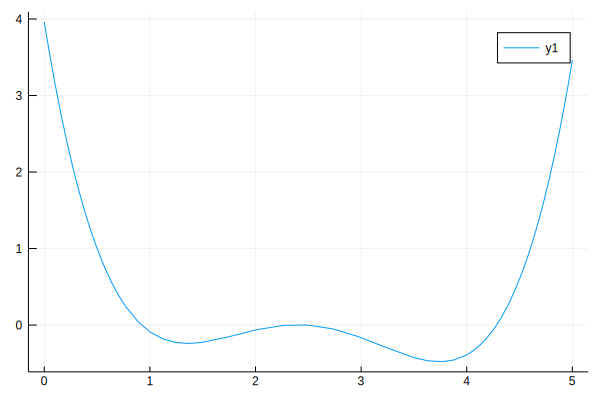

In [3]:
a1=0.7
b1=0.0
c1=1.0
d1=0.1

f_1(x) = (a1*(x-2.5)^4)/4 - (b1*(x-2.5)^3)/3 - (c1*(x-2.5)^2)/2 - d1*(x-2.5)

plot(f_1,0,5)

In [169]:
# Compute the stable stationary points and then unstable stationary points

# stable=1.35832
# stable=3.7424
# unstable=2.3993

In [170]:
# So now we can compute the steady state probability distribution for f(x) by solving it's associated FPE
# We then take U = -ln(Ps(x)) to compute the landscape
# Both Ps(x) and U will be analytical solutions

In [171]:
# The derivative of the potential function is now:
# f'(x) = -a1(x-2.5)^3 + b1(x-2.5)^2 + c1(x-2.5) + d1

In [175]:
# Check the derivative by solving the ODE with zero noise and seeing if you land up in the stable stationary points
# YES, it's correct

x₀=2.4
α=0.00
a=0.7
b=0.0
c=1.0
d=0.1
f(x,p,t) = -a*(x-2.5)^3 + b*(x-2.5)^2 + c*(x-2.5) + d
g(x,p,t) = α*x
tspan = (0.0,10.0) 
prob = SDEProblem(f,g,x₀,tspan)
saveat = 0.01
sol = solve(prob,alg_hints=[:stiff],saveat=saveat)
sol[end]

3.730857702967721

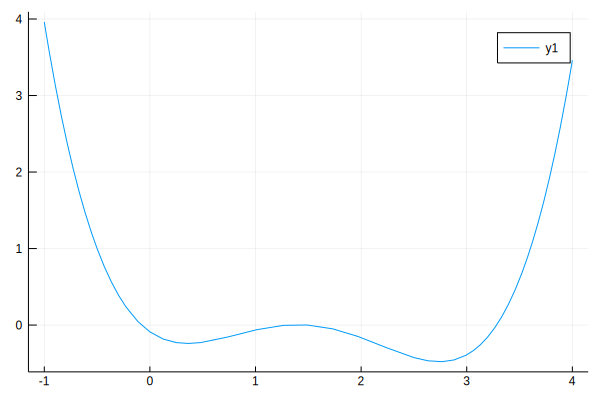

In [54]:
a1=0.7
b1=0.0
c1=1.0
d1=0.1

f_2(x) = (a1*(x-1.5)^4)/4 - (b1*(x-1.5)^3)/3 - (c1*(x-1.5)^2)/2 - d1*(x-1.5)

plot(f_2,-1,4)

# Compute the stable stationary points and then unstable stationary points

# stable=0.35832
# stable=2.7424
# unstable=1.39928

In [46]:
# Check the derivative by solving the ODE with zero noise and seeing if you land up in the stable stationary points
# YES, it's correct

x₀=1.39928
α=0.0
a=0.7
b=0.0
c=1.0
d=0.1
f(x,p,t) = -a*(x-1.5)^3 + b*(x-1.5)^2 + c*(x-1.5) + d
g(x,p,t) = α*x
tspan = (0.0,10.0) 
prob = SDEProblem(f,g,x₀,tspan)
saveat = 0.01
sol = solve(prob,alg_hints=[:stiff],saveat=saveat)
sol[end]

0.3816120204462383